covers various pytorch basics; intended for interactive use.
--matus


# tensor operations

In [1]:
import torch
# torch has its own PRNG seeds.
# setting it here so notebook is deterministic.
torch.manual_seed(0)

In [2]:
# create a non-inclusive range..
torch.arange(8)

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [3]:
# ..just like a regular python non-inclusive range
torch.tensor(range(8))

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [4]:
# a similar routine, subdividing an interval equally
torch.linspace(0, 1, 5)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

In [5]:
# standard arithmetic operations act coordinate-wise
xs = torch.linspace(0, 1, 5)
print(xs ** 2) # coordinate-wise squaring
print(xs * xs) # coordinate-wise multiplication
print((xs ** 2 - xs * xs) < 1e-16) # compare the above,
print((2.7182818 * xs).log()) # coordinate-wise multiplication and ln

tensor([0.0000, 0.0625, 0.2500, 0.5625, 1.0000])
tensor([0.0000, 0.0625, 0.2500, 0.5625, 1.0000])
tensor([True, True, True, True, True])
tensor([   -inf, -0.3863,  0.3069,  0.7123,  1.0000])


In [6]:
# pytorch tensors aren't just floating point
print(
    torch.linspace(0,1,5).dtype,
    torch.arange(5).dtype,
    (torch.arange(5) / 10).dtype,
    (torch.arange(5) // 10).dtype,
    (torch.arange(5) == 0).dtype,
)

torch.float32 torch.int64 torch.float32 torch.int64 torch.bool


/opt/miniconda3/envs/ml/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631181957/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [7]:
# arithmetic operations generally convert between types
print(torch.arange(5) * torch.arange(5))
print(torch.arange(5) * (torch.arange(5) / 1))
print(torch.arange(5) + (torch.arange(5) / 1))
print(torch.arange(5) + (torch.arange(5) == 0))

tensor([ 0,  1,  4,  9, 16])
tensor([ 0.,  1.,  4.,  9., 16.])
tensor([0., 2., 4., 6., 8.])
tensor([1, 1, 2, 3, 4])


In [7]:
# Not all types support all operations
try:
    #following does manual type conversion
    print(torch.arange(5).type(torch.float32).exp())
    print(torch.arange(5).exp())
except RuntimeError as E:
    print(f"Got exception: '{E}'")

tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5982])
tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5982])


In [8]:
# Here are some basic operations on matrix shapes
ns = torch.arange(12)
print(ns)
print(ns.reshape(3,4))
# .view() is similar to .reshape() but reuses storage;
# we'll revisit it later.
print(ns.view(2,6))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


In [9]:
# We can also reshape into 3 axes
print(ns.reshape(2,2,3))
# .reshape() and .view() also understand "-1" which means
# "choose the appropriate size so that this works out".
print(ns.reshape(-1,2,3).shape)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
torch.Size([2, 2, 3])


In [10]:
# torch also has "0 axis" (or "0 order") tensors/"arrays".
# these are convenient because they still support .exp(), etc.
e = torch.tensor(2.7182818, dtype = torch.float32)
print(e, e.shape, e.log(), e.sin())
# method .item() extracts a python number
print(e, e.item())
# lol:
print(torch.tensor(2.7182818, dtype = torch.float64).item())
try:
    # .item() only works on single-element tensors
    print(torch.zeros(1,1,1,1).item())
    print(torch.zeros(2).item())
except ValueError as E:
    print(f"Got exception: '{E}'")

tensor(2.7183) torch.Size([]) tensor(1.0000) tensor(0.4108)
tensor(2.7183) 2.7182817459106445
2.7182818
0.0
Got exception: 'only one element tensors can be converted to Python scalars'


In [11]:
# back to larger tensors,
# _some_ (but not all) operations complain about size mismatch.
try:
    vs = torch.arange(6).reshape(2,3)
    print(vs + vs)
    print(vs + vs.T)
except RuntimeError as E:
    print(f"Got exception: '{E}'")

tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
Got exception: 'The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1'


In [13]:
# but some operations _do_ succeed with mismatched shapes!
# whenever a dimension is 1, it applies along axis
vs = torch.arange(4)
print(vs.reshape(1, -1) + vs.reshape(-1, 1))
print(vs.reshape(1, -1, 1) + vs.reshape(-1, 1, 1) + vs.reshape(1, 1, -1))

tensor([[0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]])
tensor([[[0, 1, 2, 3],
         [1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6]],

        [[1, 2, 3, 4],
         [2, 3, 4, 5],
         [3, 4, 5, 6],
         [4, 5, 6, 7]],

        [[2, 3, 4, 5],
         [3, 4, 5, 6],
         [4, 5, 6, 7],
         [5, 6, 7, 8]],

        [[3, 4, 5, 6],
         [4, 5, 6, 7],
         [5, 6, 7, 8],
         [6, 7, 8, 9]]])


In [14]:
# here's a simpler instance of the same behavior:
torch.zeros(4, 4) + torch.arange(4).reshape(-1, 1)

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [14]:
# This can be very convenient:
# here we normalize the rows of a matrix:
X = torch.randn(3,2)
print(X.norm(dim = 1))
# A few things going on here, I recommend trying this one
# yourself and studying each piece.
X /= X.norm(dim = 1, keepdim = True)
print(X.norm(dim = 1))

tensor([1.5687, 2.2517, 1.7698])
tensor([1.0000, 1.0000, 1.0000])


In [15]:
# slicing makes it easy to access submatrices/subtensors
ns = torch.arange(12).reshape(2,6)
print(ns)
print(ns[0, :]) # first row
print(ns[:, 0]) # first column
ms = ns.reshape(2,2,3)
print(ms)
print(ms[0,0,:])
print(ms[0, ...]) # dots mean "all remaining axes/dimensions"
print(ms[..., 0])

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([0, 1, 2, 3, 4, 5])
tensor([0, 6])
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
tensor([0, 1, 2])
tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [6, 9]])


In [16]:
# Slicing can also take integer lists as input
print(ns[:, [0, 2, 4]])
# Also boolean masks
print(ns[:, [ True, False, True, False, True, False]])
try:
    # you can use pytorch integer arrays as well
    print(ns[:, torch.arange(2)])
    # but not float arrays
    print(ns[:, torch.arange(2) / 1])
except IndexError as E:
    print(f"Got exception: '{E}'")

tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
tensor([[ 0,  2,  4],
        [ 6,  8, 10]])
tensor([[0, 1],
        [6, 7]])
Got exception: 'tensors used as indices must be long, byte or bool tensors'


In [17]:
# many operations have in-place versions.
# superficially this is good for efficiency reasons.
# more importantly, pytorch does some internal book-keeping
# with autodifferentiation which is lost if you do not do
# in-place operations for variables you wish to compute
# gradients with respect to.
# (This will be clarified later.)
# For now, here are some example in-place operations
v = torch.randn(5,4)
print(v.norm())
v += v # in-place arithmetic operations
v *= 2
print(v.norm())
v.clamp_(0, float('inf')) # zero out negative values, in-place
print(v.norm())

tensor(3.7304)
tensor(14.9216)
tensor(11.3672)


In [18]:
# this step only matters if you have a gpu.
# this line of code is in my pytorch programs, it means
# "variable 'device' is first gpu if available, else cpu".
device = torch.device("cpu" if not torch.cuda.is_available()
                      else "cuda:0")
# that didn't put anything on gpu; we manually move things there
ns = torch.arange(4)
ns2 = ns.to(device)
print(ns.device, ns2.device)

try:
    # python disallows operations mixing cpu and gpu;
    # this is good, since moving data between them is expensive.
    ns + ns2
    print("no exception: no gpu in use")
except Exception as E:
    print(f"pytorch error: {E}")

cpu cpu
no exception: no gpu in use


# matplotlib plotting

In [21]:
import matplotlib.pyplot as plt

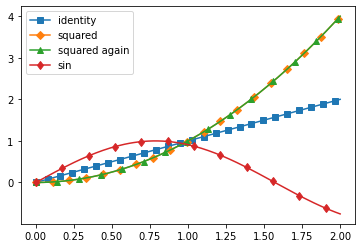

In [22]:
# plt.plot() lets you display many curves.
# it has many parameters; in jupyter and ipythong, you can execute
# "plt.plot?" to see some of them.
# note: gpu data must be moved to cpu before being passed to matplotlib
xs = torch.linspace(0, 2, 128)
plt.plot(xs, xs, marker = 's', markevery = 5,
         label = "identity")
plt.plot(xs, xs ** 2, marker = 'D', markevery = 7,
         label = 'squared')
plt.plot(xs, xs * xs, marker = '^', markevery = 9,
         label = 'squared again')
plt.plot(xs, (2 * xs).sin(), marker = 'd', markevery = 11,
         label = 'sin')
plt.legend()

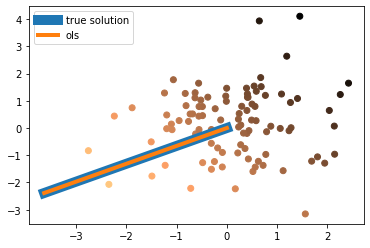

In [23]:
# We can put scatterplots and curve plots in the same figure.
# if invoking this from a python script, you'd need to do 
# plt.clf()
# to clear the figure after the previous one
# (and also plt.savefig() or plt.show() to display).
X = torch.randn(100, 2) # create some random data
u = torch.randn(2) # sample a random "correct" linear predictor
# pick a norm for u that has easy visualization:
u *= X.norm(dim = 1).max() / u.norm()
y = X @ u # label data according to the "planted" predictor
# scatterplot of data, y given by color:
plt.scatter(
    X[:, 0],
    X[:, 1],
    # color according to y:
    c = (y - y.min()) / (y.max() - y.min()),
    cmap = "copper",
)
# note that these plots are the weight vectors, not decision boundary
plt.plot([0, u[0]], [0, u[1]], lw = 10, label = "true solution")
ols = X.pinverse() @ y
plt.plot([0, ols[0]], [0, ols[1]], lw = 4, label = "ols")
plt.legend()

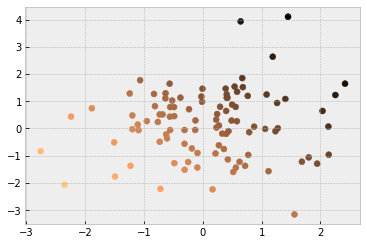

In [24]:
# matplotlib has many features; here's a cute one to restyle a plot:
with plt.style.context("bmh"):
    plt.scatter(
        X[:, 0],
        X[:, 1],
        # color according to y:
        c = (y - y.min()) / (y.max() - y.min()),
        cmap = "copper",
    )

# autodifferentiation

In [25]:
# let's go back to the scatterplot from before:
print(X.shape, u.shape, y.shape)
# we'll find another with "manual" gradient descent
v = torch.zeros(2)
# another with automatic gradient computation
w = torch.zeros(2, requires_grad = True)
# another with automatic gradient computation
# but also using torch.optim
z = torch.zeros(2, requires_grad = True)
# this "requires_grad = True" means
# "whenever this object appears in expressions, track how it is used,
# so we can compute gradients later"

torch.Size([100, 2]) torch.Size([2]) torch.Size([100])


In [25]:
# Can directly modify requires_grad
q = torch.randn(5,5)
print(q.requires_grad)
q.requires_grad = True
print(q.requires_grad)
q.requires_grad_(False)
print(q.requires_grad)

False
True
False


In [26]:
print(torch.randn(5,5) @ torch.randn(5, requires_grad = True))
print(torch.randn(5,5) @ torch.randn(5))

tensor([-3.1597, -0.1324, -2.6432, -0.4946,  0.1561], grad_fn=<MvBackward>)
tensor([ 1.1368,  0.4844,  2.7441, -2.1615,  2.5783])


iter 0 risk 12.4 12.4 12.4
iter 1 risk 9.25 9.25 9.25
iter 2 risk 6.93 6.93 6.93
iter 3 risk 5.21 5.21 5.21
iter 4 risk 3.93 3.93 3.93
iter 5 risk 2.98 2.98 2.98
iter 6 risk 2.26 2.26 2.26
iter 7 risk 1.73 1.73 1.73
iter 8 risk 1.32 1.32 1.32
iter 9 risk 1.02 1.02 1.02
iter 10 risk 0.785 0.785 0.785
iter 11 risk 0.608 0.608 0.608
iter 12 risk 0.472 0.472 0.472
iter 13 risk 0.368 0.368 0.368
iter 14 risk 0.288 0.288 0.288
iter 15 risk 0.226 0.226 0.226
iter 16 risk 0.177 0.177 0.177
iter 17 risk 0.14 0.14 0.14
iter 18 risk 0.111 0.111 0.111
iter 19 risk 0.0875 0.0875 0.0875


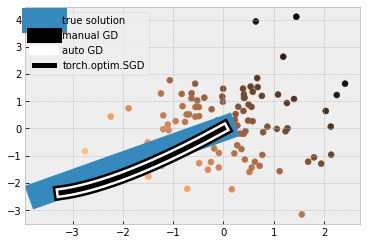

In [27]:
# now let's do some iterations of gradient descent on w and v
stepsize = 0.1 # a small one to help visualize
# we'll use pytorch's sgd for z:
z_optimizer = torch.optim.SGD([z], lr = stepsize)
n_iters = 20
V = torch.empty(n_iters, 2)
W = torch.empty(n_iters, 2)
Z = torch.empty(n_iters, 2)
for i in range(n_iters):
    # let's save all iterates to plot them later
    V[i, :] = v
    # for w and z, if we copy them in like v, then
    # W also gets requires_grad enabled.
    # We can use .detach() to disconnect from the computation graph
    W[i, :] = w.detach()
    Z[i, :] = z.detach()

    # manual gradient computation on v:
    v_risk = ((X @ v - y) ** 2 / 2).mean()
    # take a gradient step:
    v -= stepsize * X.T @ (X @ v - y) / X.shape[0]
    
    # automatic gradient computation on w:
    w_risk = ((X @ w - y) ** 2 / 2).mean()
    # following line means
    # "go through the computation of 'w_risk',
    # and save gradient information for 
    # tensors with all requires_grad=True"
    w_risk.backward()
    # we still need _use_ the saved gradient information
    

    with torch.no_grad():
        # we will do that inside a torch.no_grad() block.
        # this  means "here we do not track gradient computations".
        # this particular gradient computation blows up in various
        # ways without the block.
        # for v we were fine, there are no requires_grad variables.
        w -= stepsize * w.grad
        # w.grad is where gradient information was stored.
        # we must explicitly clear it, or else it will be combined
        # with future iteration gradient information
        w.grad.zero_()
        # the .zero_() means "zero this out in place".
        
    # now let's do z
    z_optimizer.zero_grad() # the optimizer handles this now
    # rest is familiar from w:
    z_risk = ((X @ z - y) ** 2 / 2).mean()
    z_risk.backward()
    # now do the update.  torch.no_grad() is unnecessary
    # because .step() invokes it internally.
    z_optimizer.step() # thanks, pytorch
    
    # lastly let's print the empirical risk of all
    with torch.no_grad():
        print(f"iter {i}"
              f" risk {v_risk:.3g} {w_risk:.3g} {z_risk:.3g}")

with plt.style.context("bmh"):
    plt.scatter(
        X[:, 0],
        X[:, 1],
        # color according to y:
        c = (y - y.min()) / (y.max() - y.min()),
        cmap = "copper",
    )
    plt.plot([0, u[0]], [0, u[1]], lw = 25, label = "true solution")
    plt.plot(V[:, 0], V[:, 1],
             lw = 15, color = 'black',
             label = "manual GD")
    plt.plot(W[:, 0], W[:, 1],
             lw = 10, color = 'white',
             label = "auto GD")
    plt.plot(Z[:, 0], Z[:, 1],
             lw = 5, color = 'black',
             label = "torch.optim.SGD")
    plt.legend()    

In [28]:
# Let's take a moment to study the last w_risk
w_risk

tensor(0.0875, grad_fn=<MeanBackward0>)

In [30]:
W

tensor([[ 0.0000,  0.0000],
        [-0.4129, -0.4093],
        [-0.7771, -0.7513],
        [-1.0985, -1.0368],
        [-1.3824, -1.2748],
        [-1.6334, -1.4731],
        [-1.8554, -1.6381],
        [-2.0520, -1.7752],
        [-2.2261, -1.8889],
        [-2.3805, -1.9832],
        [-2.5175, -2.0611],
        [-2.6390, -2.1254],
        [-2.7470, -2.1783],
        [-2.8430, -2.2219],
        [-2.9283, -2.2575],
        [-3.0042, -2.2866],
        [-3.0718, -2.3103],
        [-3.1320, -2.3295],
        [-3.1856, -2.3450],
        [-3.2334, -2.3574]])

In [29]:
# the "grad_fn" is also part of the computation tracking.
# if we use .detach() here, similarly it clears this.
w_risk.detach()

tensor(0.0875)

In [30]:
# .detach() often comes up in documentation together with .clone();
# this is the recommended safe way to duplicate a tensor.
w_risk.detach().clone()

tensor(0.2377)

In [31]:
# here's an example of what goes wrong within torch.no_grad.
w2 = torch.randn(2, requires_grad = True)
risk = ((X @ w2 - y) ** 2 / 2).mean()
risk.backward()
with torch.no_grad():
    # WRONG WAY: assign to a temporary variable
    w3 = w - stepsize * w.grad
    # RIGHT WAY: in place operations.
    w2 -= stepsize * w2.grad
    # same goes with other operations like torch.clamp(), etc.
    # notice that one of the following changes
    print(w3.requires_grad, w2.requires_grad)

False True


In [31]:
# note that "autodifferentiation" doesn't require differentiability.
w = torch.zeros((), requires_grad = True) # scalar zero
nondiff = torch.nn.functional.relu(w)
nondiff.backward()
# relu is not differentiable at zero...
print(w.grad)
# relu has clarke differential (and subdifferential) of [0,1] at 1.
# so anything within [0,1] seems reasonable.

tensor(0.)


In [32]:
# good job, pytorch, how about this one.
w.grad.zero_() # first zero out old gradient
relu = torch.nn.functional.relu # shorthand
tricky = relu(w) - relu(-w) # identity map
tricky.backward()
print(w.grad) # 1 is the only correct value

tensor(0.)


# single-layer networks

In [33]:
# a basic fully connected layer; randomly initialized
fc1 = torch.nn.Linear(5,4, bias = True)
# another one, different random init:
fc2 = torch.nn.Linear(5,4, bias = True)

# let's apply these layers to some data
x = torch.randn(5)
# you can call them like functions.  result nonzero due to random init.
print((fc1(x) - fc2(x)).norm())

tensor(0.8147, grad_fn=<CopyBackwards>)


In [35]:
# A layer is itself a subclass of the general torch network class
print(isinstance(fc1, torch.nn.Module))
# this class contains main convenient operations.
# here are two ways to apply them to data:
print((fc1(x) - fc1.forward(x)).norm())
# note that .forward()'s name matches with .backward(),
# corresponding to backpropagation.
# here we see we can print networks, useful for debugging:
print(fc1)

True
tensor(0., grad_fn=<CopyBackwards>)
Linear(in_features=5, out_features=4, bias=True)


In [36]:
# torch.nn.Module instances can iterate over parameters.
# most often we use this to define gradient descent
for P in fc1.parameters():
    print(P.shape)

torch.Size([4, 5])
torch.Size([4])


In [37]:
# what about with no bias?
for P in torch.nn.Linear(5,4, bias = False).parameters():
    print(P.shape)

torch.Size([4, 5])


In [38]:
# this zeros out gradients.
fc1.zero_grad()
# it is like accessing the weights (and biases!) within fc1
# and calling .zero_().

In [39]:
fc = torch.nn.Linear(5, 1)
# torch networks can take minibatches directly as input;
# now the inputs are written as rows.
X = torch.randn(10, 5)
print(fc(X[0, :]).shape) # column vector in, singleton vector out
print(fc(X).shape) # matrix in, _matrix_ out
print(fc(X[:5, :]).shape) # now with a minibatch

torch.Size([1])
torch.Size([10, 1])
torch.Size([5, 1])


In [40]:
# Typically pytorch code does not directly extra minibatches from
# a big data tensor, but uses wrappers from torch.utils.data
nb = 32
n = 256
# following wraps inputs and outputs into single object
data = torch.utils.data.TensorDataset(
    torch.arange(n).type(torch.float32), # our fake input data
    # using sequential data to tell apart shuffle and not
    torch.randint(0, 10, (n,)) # our labels
)
for shuffle in [ False, True ]:
    # DataLoader handles minibatching
    loader = torch.utils.data.DataLoader(data, batch_size = nb,
                    shuffle = shuffle, num_workers = 1)
    # loader exposes an iterable interface:
    for (i, (Xb, yb)) in enumerate(loader):
        print(f"shuffle {shuffle} {i} {Xb.min() / nb:.3g}")

shuffle False 0 0
shuffle False 1 1
shuffle False 2 2
shuffle False 3 3
shuffle False 4 4
shuffle False 5 5
shuffle False 6 6
shuffle False 7 7
shuffle True 0 0.25
shuffle True 1 0
shuffle True 2 0.188
shuffle True 3 0.0625
shuffle True 4 0.0938
shuffle True 5 0.406
shuffle True 6 0.438
shuffle True 7 0.125


In [41]:
# here's a gotcha!
# for linear logistic regression, we did y * (X @ w).  now:
y = torch.randn(X.shape[0])
print((y * fc(X)).shape) # OOPS
print((y * fc(X).view(-1)).shape) # correct...

torch.Size([10, 10])
torch.Size([10])


In [42]:
# We can also move entire networks to gpu with one function call
# (in this case, it moves the weights and the biases).
fc.to(device)

Linear(in_features=5, out_features=1, bias=True)

In [43]:
# We can also create convolutional layers easily
conv = torch.nn.Conv2d(5, 4, 2)
# example random data with 10 6x6 images using 5 channels:
X = torch.randn(10, 5, 6, 6)
print(conv(X[:1, ...]).shape) #output on first example
print(conv(X).shape) #output on whole batch
try:
    # unfortunately, unlike for linear layers,
    # we _must_ use inputs with 4 axes of input
    print(conv(X[0, ...]).shape)
except Exception as E:
    print(f"Got exception: '{E}'")
# just a sanity check:
# indeed convolutional layers, unlike linear layers,
# can handle different choices of input width x height
print(conv(torch.randn(10, 5, 10, 10)).shape)

torch.Size([1, 4, 5, 5])
torch.Size([10, 4, 5, 5])
Got exception: 'Expected 4-dimensional input for 4-dimensional weight [4, 5, 2, 2], but got 3-dimensional input of size [5, 6, 6] instead'
torch.Size([10, 4, 9, 9])


In [44]:
# convolutional layers also have biases on by default!
for P in conv.parameters():
    print(P.shape)

torch.Size([4, 5, 2, 2])
torch.Size([4])


In [45]:
# activations also subclass torch.nn.Module
relu = torch.nn.ReLU()
print(relu)
print(len(list(relu.parameters())))
v = torch.linspace(-3, 3, 7)
print(relu(v))
# many layer types can also be invoked "functionally",
# without creating a layer object.
print(torch.nn.functional.relu(v))
# we can also call relu directly on tensors.
print(v.relu())

ReLU()
0
tensor([0., 0., 0., 0., 1., 2., 3.])
tensor([0., 0., 0., 0., 1., 2., 3.])
tensor([0., 0., 0., 0., 1., 2., 3.])


In [46]:
# We also have softmax layers...
v = torch.randn(4)
softmax = torch.nn.Softmax(dim = 0)
print(softmax(v))
print(torch.nn.functional.softmax(v, dim = 0))
print(v.softmax(dim = 0))
# let's sanity check 
print(v.exp() / v.exp().sum())

tensor([0.2931, 0.2581, 0.2208, 0.2280])
tensor([0.2931, 0.2581, 0.2208, 0.2280])
tensor([0.2931, 0.2581, 0.2208, 0.2280])
tensor([0.2931, 0.2581, 0.2208, 0.2280])


In [47]:
# Let's further sanity check softmax with cross entropy
yhat = v.view(1, -1)
y = torch.ones(1,).type(torch.long)
print(torch.nn.functional.cross_entropy(yhat, y))
# It also exists as a layer!
risk = torch.nn.CrossEntropyLoss()
assert(len(list(risk.parameters())) == 0)
print(risk(yhat, y))
# variable name "risk" because averages batches:
yhat = torch.randn(10, 5)
y = torch.randint(0, yhat.shape[1], (yhat.shape[0],))
risk1 = risk(yhat, y)
assert(len(risk1.shape) == 0)
# lastly let's check the computation manually.
# pytorch has .logsumexp() for numerical reasons;
# following slicing has a tiny gotcha, can't use : in place of range.
risk2 = (- yhat[torch.arange(10), y] + yhat.logsumexp(dim = 1)).mean()
# another way
risk3 = -yhat.softmax(dim = 1)[torch.arange(10), y].log().mean()
assert((risk2 - risk1).abs().item() < 1e-6 and
      (risk3 - risk2).abs().item() < 1e-6)

tensor(1.3544)
tensor(1.3544)


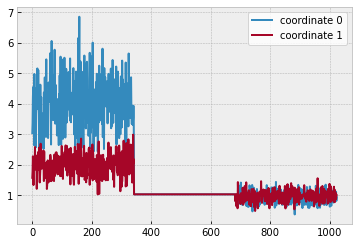

In [48]:
# Lastly, let's study batch norm a little bit.
# Let's play with the .train() and eval() routines,
# and also see if we can observe the normalization.
d = 2
bn = torch.nn.BatchNorm1d(d)
bn.eval() # disable tracking of statistics
# Gaussian data, axis aligned, different variances.
X = torch.randn(1024, d) @ torch.tensor([[4.0, 0,], [0, 2]])
n_iters = 1024
stddevs = torch.empty(n_iters, d)
import random
for iters in range(n_iters):
    x_mb = X[random.sample(range(X.shape[0]), 16), :]
    out = bn(x_mb)
    with torch.no_grad():
        if iters == n_iters // 3:
            bn.train()
        elif iters == 2 * n_iters // 3:
            bn.eval()
        stddevs[iters, :] = out.std(dim = 0)
with plt.style.context('bmh'):
    for j in range(d):
        plt.plot(range(n_iters), stddevs[:, j],
                 label = f"coordinate {j}")
plt.legend()

In [49]:
# note that batch norm has those "affine" parameters by default.
# we did not do any updates do them, so they're still default.
for P in bn.parameters():
    print(P.data)

tensor([1., 1.])
tensor([0., 0.])


# multi-layer networks

In [50]:
# now let's work with multi-layer networks.
# for networks that just stack standard types of layers,
# here is an easy way:
net = torch.nn.Sequential(
    torch.nn.Linear(5,100),
    torch.nn.ReLU(), 
    torch.nn.Linear(100,1)
)
# note that "number layers" is already ambiguous and inconsistent
# across neural net conventions...

# we still have .forward(), function call, .zero_grad(), 
net(x)

tensor([-0.8076], grad_fn=<AddBackward0>)

In [51]:
print(net) # compare this with printing just torch.nn.Linear

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


In [52]:
# since now we have multiple layers,
# .parameters() may be confusing for debugging purposes
# since each layer can have multiple parameters (e.g., due to bias).
# instead, we can use .named_parameters().
# here we can see the default names:
for (Pname, P) in net.named_parameters():
    print(Pname, P.shape)

0.weight torch.Size([100, 5])
0.bias torch.Size([100])
2.weight torch.Size([1, 100])
2.bias torch.Size([1])


In [53]:
# also convenient to define networks as classes.
class SquaredReLUNet(torch.nn.Module):
    def __init__(self, d, width):
        super(SquaredReLUNet, self).__init__() # boilerplate
        self.d = d
        self.width = width
        self.fc1 = torch.nn.Linear(d, width, bias = False)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(width, 1, bias = False)
        # torch.nn.Module "sees" fc1 and fc2 and they are
        # accessed by operations like zero_grad(), parameters(), etc.
        # for more exotic architectures, you need to
        # manually register with self.add_module().
        
    def forward(self, x):
        x = self.fc1(x)
        # squared ReLU; more convenient than with torch.nn.Sequential
        x = self.relu(x) ** 2
        return self.fc2(x)
    
net = SquaredReLUNet(5, 128)
net(torch.randn(50, 5)).shape

torch.Size([50, 1])

In [54]:
net.zero_grad() # let's clear all gradient information.
(X, y) = (torch.randn(50, 5), torch.randn(50))
risk = ((net(X).view(-1) - y) ** 2).mean() / 2 # note ".view(-1)"
risk.backward()
with torch.no_grad():
     # they all get magically registered in the __init__
    for (Pi, P) in enumerate(net.parameters()):
        print(Pi, P.shape, P.grad.shape)
        P -= 0.01 * P.grad # in place operations !
    
    # it is possible that it doesn't decrease,
    # since the step size is fixed but the random data could be wild...
    print(f"risk should decrease: init {risk:.3g}, "
           f"one iter {(((net(X).view(-1) - y) ** 2).mean() / 2):.3g}")

0 torch.Size([128, 5]) torch.Size([128, 5])
1 torch.Size([1, 128]) torch.Size([1, 128])
risk should decrease: init 0.53, one iter 0.525
